In [205]:
# Importing the dependencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler



In [186]:
# Data collection & analysis 
# Loading the data from pandas dataframe 
insurance_dataset = pd.read_csv('insurance.csv')

# first 5 rows of the dataframe 
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
insurance_dataset.shape 

(1338, 7)

In [188]:
# getting some informations about dataset 
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [189]:
# Checking for missing values 
insurance_dataset.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [190]:
# statistical measures of the dataset 

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

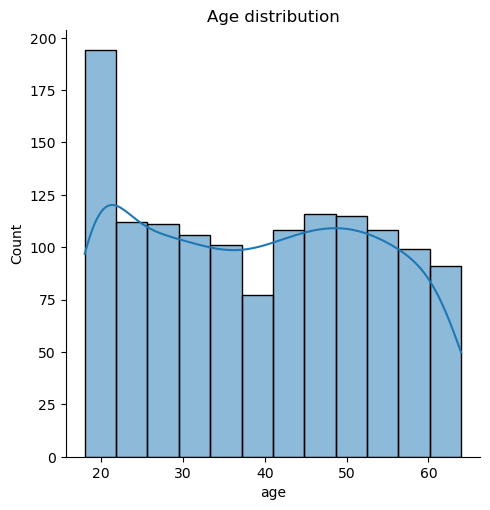

In [191]:
# distribution of age value 

# sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'], kde=True) 
plt.title('Age distribution')
plt.show()


In [192]:
def encoding_feature(dataset, cols): 
    enc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
    for col in cols: 
        encoder = enc.fit_transform(dataset[[col]]) 
        dataset = pd.concat([dataset, encoder], axis=1).drop(columns=[col])
    return dataset

In [193]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [194]:
insurance_dataset = encoding_feature(insurance_dataset, ['sex', 'smoker', 'region'])

In [195]:
insurance_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [196]:
def scaling_feature(dataset): 
    scalar = MinMaxScaler().set_output(transform='pandas')
    dataset[['age', 'bmi','children']] = scalar.fit_transform(dataset[['age', 'bmi', 'children']]) #
    # dataset = pd.concat([dataset, age_bmi], axis=1).drop(columns=['age', 'bmi'])
    # return dataset


In [197]:
scaling_feature(insurance_dataset)
insurance_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [198]:
X = insurance_dataset.drop(columns=['charges'])
y = insurance_dataset.charges

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [200]:
# training the model using Linear regression model 
linear_regression = LinearRegression()
linear_reg = linear_regression.fit(X_train, y_train)
linear_reg_prediction = linear_reg.predict(X_test)


In [201]:
# Evaluating the model using r2_score 
test_error = metrics.r2_score(y_test, linear_reg_prediction)
test_error

0.7890155222599085

In [202]:
ridge_pre = Ridge()
ridge_pre = ridge_pre.fit(X_train, y_train)
ridge_prediction = ridge_pre.predict(X_test)

In [203]:
# Evaluating the model using r2_score 
test_error = metrics.r2_score(y_test, ridge_prediction)
test_error


0.7885416649289096

In [206]:
random_fore = RandomForestRegressor()
random_fore = random_fore.fit(X_train, y_train)
random_for_prediction = random_fore.predict(X_test)


In [208]:
# Evaluating the model using r2_score 
test_error = metrics.r2_score(y_test, random_for_prediction)
test_error

0.8651772656502732